In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [72]:
PATH = 'logo_images'

file_names = os.listdir(PATH)

os.makedirs('train_data')

for i, name in enumerate(file_names):
    img = Image.open(os.path.join(PATH, name)).convert('RGBA')
    background = Image.new('RGBA', img.size, (255, 255, 255, 255))
    result = Image.alpha_composite(background, img).convert('RGB')
    result = result.resize((224, 224))
    result.save(f'train_data/image{i}.png', 'png')

# Modeling

In [128]:
dataroot = 'train_data'

batch_size = 32

image_size = 224

RGB = 3

dimz = 100

num_epochs = 10

lr = 0.0002

beta1 = 0.5

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.utils.data import Dataset
import matplotlib.animation as animation


class Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_list[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image
    
transform = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            ])

dataset = Dataset(dataroot, transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [130]:
device

device(type='mps')

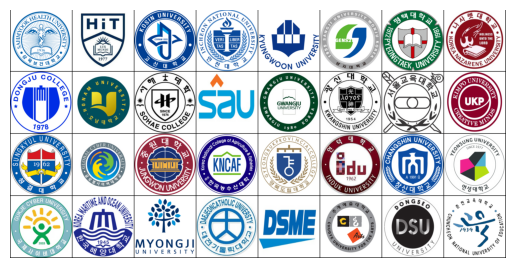

In [141]:
batch = next(iter(dataloader))
batch_norm = (batch + 1) / 2
grid = vutils.make_grid(batch_norm, nrow=8, padding=2, normalize=False)
grid_np = grid.cpu().numpy().transpose((1, 2, 0))
plt.imshow(grid_np)
plt.axis('off')
plt.show()